In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [58]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [59]:
data = pd.DataFrame({'weather': weather, 'temp': temp, 'play':play})

# 문제 1. 날씨가 overcast일 때 경기를 할 확률은?

P(Yes|Overcast) = P(Overcast|Yes) P(Yes) / P(Overcast) 

In [60]:
len(data)

14

In [61]:
data[(data['play'] == 'Yes')] #P(Yes) = 9/14 = 0.64

,weather,temp,play
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
6,Overcast,Cool,Yes
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes
10,Sunny,Mild,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [62]:
len(data[(data['play'] == 'Yes')])

9

In [63]:
data[(data['weather'] == 'Overcast') & (data['play'] == 'Yes')] #P(Overcast|Yes) = 4/9 = 0.44

,weather,temp,play
2,Overcast,Hot,Yes
6,Overcast,Cool,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [64]:
len(data[(data['weather'] == 'Overcast') & (data['play'] == 'Yes')])

4

In [65]:
data[data['weather'] == 'Overcast'] # P(Overcast) = 4/14 = 0.29

,weather,temp,play
2,Overcast,Hot,Yes
6,Overcast,Cool,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [66]:
len(data[data['weather'] == 'Overcast'] ) 

4

 P(Yes|Overcast) = P(Overcast|Yes) P(Yes) / P(Overcast) = 0.44 * 0.64 / 0.29 = 0.98

#문제 2. 날씨가 overcast, 기온이 Mild일 때 경기를 할 확률은?

P(Paly=Yes | Weather=Overcast, Temp=Mild) = P(Weather=Overcast, Temp=Mild | Play=Yes) P(Play=Yes) / P(Weather=Overcast, Temp=Mild)



P(Weather=Overcast, Temp=Mild | Play=Yes) = P(Overcast|Yes) P(Mild|Yes)

P(Weather=Overcast, Temp=Mild) = P(Weather=Overcast) P(Temp=Mild)

In [67]:
data[(data['play'] == 'Yes')] #P(Yes) = 9/14 = 0.64

,weather,temp,play
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
6,Overcast,Cool,Yes
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes
10,Sunny,Mild,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [12]:
data[(data['weather'] == 'Overcast') & (data['play'] == 'Yes')] #P(Overcast|Yes) = 4/9 = 0.44

,weather,temp,play
3,Rainy,Mild,Yes
9,Rainy,Mild,Yes
10,Sunny,Mild,Yes
11,Overcast,Mild,Yes


In [68]:
data[(data['temp'] == 'Mild') & (data['play'] == 'Yes')] #P(Mild|Yes) = 4/9 = 0.44

,weather,temp,play
3,Rainy,Mild,Yes
9,Rainy,Mild,Yes
10,Sunny,Mild,Yes
11,Overcast,Mild,Yes


P(Weather=Overcast, Temp=Mild | Play=Yes) = P(Overcast|Yes) P(Mild|Yes) = 0.44 * 0.44 = 0.1936

In [69]:
data[data['weather'] == 'Overcast'] # P(Overcast) = 4/14 = 0.29

,weather,temp,play
2,Overcast,Hot,Yes
6,Overcast,Cool,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [70]:
data[data['temp'] == 'Mild'] # P(Mild) = 6/14 = 0.29

,weather,temp,play
3,Rainy,Mild,Yes
7,Sunny,Mild,No
9,Rainy,Mild,Yes
10,Sunny,Mild,Yes
11,Overcast,Mild,Yes
13,Rainy,Mild,No


P(Weather=Overcast) P(Temp=Mild) = (4/14) * (6/14) = 0.1224

0.1936 * 0.64 / 0.1224 = 1

# IRIS data

In [71]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.DataFrame(iris.target, columns =['traget'])

In [72]:
train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state = 42)

In [73]:
model = GaussianNB() #(priors = [1/100, 1/100, 98/100])
model.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [74]:
model.predict(test_X)[:1]

array([1])

In [75]:
test_y[:1]

,traget
73,1


In [76]:
model.predict_proba(test_X)[:1]

array([[5.97327448e-90, 9.95635767e-01, 4.36423302e-03]])

In [77]:
pred_test = model.predict(test_X)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_test)

1.0

# metric 평가지표

In [79]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 35, n_features=2, n_informative=2, n_redundant=0, random_state=123)

In [80]:
clf = GaussianNB().fit(X, y)
pred = clf.predict(X)

In [81]:
clf.predict_proba(X)

array([[0.94299771, 0.05700229],
       [0.01240318, 0.98759682],
       [0.54140925, 0.45859075],
       [0.23072766, 0.76927234],
       [0.018573  , 0.981427  ],
       [0.77503221, 0.22496779],
       [0.10875314, 0.89124686],
       [0.90179578, 0.09820422],
       [0.99268671, 0.00731329],
       [0.50194421, 0.49805579],
       [0.92613622, 0.07386378],
       [0.19335327, 0.80664673],
       [0.12698624, 0.87301376],
       [0.75664481, 0.24335519],
       [0.95401449, 0.04598551],
       [0.67952126, 0.32047874],
       [0.77305934, 0.22694066],
       [0.10255464, 0.89744536],
       [0.14313141, 0.85686859],
       [0.93919605, 0.06080395],
       [0.99106378, 0.00893622],
       [0.83795375, 0.16204625],
       [0.1075935 , 0.8924065 ],
       [0.94529023, 0.05470977],
       [0.85546535, 0.14453465],
       [0.00103127, 0.99896873],
       [0.0018891 , 0.9981109 ],
       [0.5926395 , 0.4073605 ],
       [0.24729754, 0.75270246],
       [0.25696383, 0.74303617],
       [0.

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y, pred)

array([[16,  2],
       [ 3, 14]])

In [85]:
y

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [86]:
clf.predict_proba(X)[:,1]

array([0.05700229, 0.98759682, 0.45859075, 0.76927234, 0.981427  ,
       0.22496779, 0.89124686, 0.09820422, 0.00731329, 0.49805579,
       0.07386378, 0.80664673, 0.87301376, 0.24335519, 0.04598551,
       0.32047874, 0.22694066, 0.89744536, 0.85686859, 0.06080395,
       0.00893622, 0.16204625, 0.8924065 , 0.05470977, 0.14453465,
       0.99896873, 0.9981109 , 0.4073605 , 0.75270246, 0.74303617,
       0.99822252, 0.965361  , 0.65477258, 0.00183388, 0.012744  ])

In [87]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.05555556, 0.05555556,
        0.16666667, 0.16666667, 0.22222222, 0.22222222, 1.        ]),
 array([0.        , 0.05882353, 0.47058824, 0.47058824, 0.82352941,
        0.82352941, 0.94117647, 0.94117647, 1.        , 1.        ]),
 array([1.99896873e+00, 9.98968727e-01, 8.92406496e-01, 8.91246860e-01,
        7.43036170e-01, 4.98055787e-01, 4.07360502e-01, 3.20478745e-01,
        2.43355193e-01, 1.83388168e-03]))

In [50]:
thresholds

array([1.99896873e+00, 9.98968727e-01, 8.92406496e-01, 8.91246860e-01,
       7.43036170e-01, 4.98055787e-01, 4.07360502e-01, 3.20478745e-01,
       2.43355193e-01, 1.83388168e-03])

In [52]:
roc_auc = auc(fpr, tpr)

In [88]:
roc_auc

0.9477124183006536

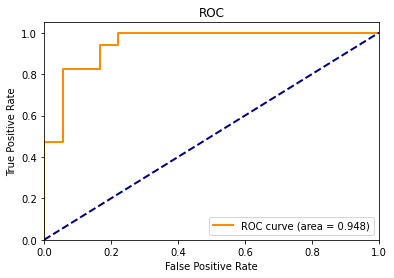

In [89]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [56]:
roc_auc

0.9477124183006536

#과제
breast cancer data를 이용하여 다음 모델을 사용하여 분류작업을 수행합니다.
- 가우시안 나이브 베이즈
- 결정트리 (혹은 자신이 사용하는 모델을 사용해도 좋습니다.)

모델에 대한 ROC Curve 그래프와 AUC값을 표현하세요.
그리고 모델들의 그래프를 비교하여 개인의 생각을 설명하세요.